In [2]:
import pandas as pd

df = pd.read_csv('/Users/fuguan/Desktop/data/joined_data.csv')

# Display first 5 rows
print(df.head())

   rating                             title_x  \
0     5.0                       Pretty locket   
1     5.0                                   A   
2     3.0  Adult friendly; Not for small kids   
3     5.0                   Bright and summer   
4     5.0                 My Kid loves these!   

                                                text images_x        asin  \
0  I think this locket is really pretty. The insi...       []  B00LOPVX74   
1                                              Great       []  B07B4JXK8D   
2  Works OK for adults and is not at all kid frie...       []  B089S8MFCQ   
3  What a cute top! Cam wait to wear in warm weat...       []  B087M39LVV   
4  My son is a big Ninjago fan and these are perf...       []  B091GMMYPS   

  parent_asin                       user_id                timestamp  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ  2020-01-09 00:06:34.489   
1  B07B4JXK8D  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  2020-12-20 01:04:06.701   
2  B089S8MFCQ  AHTTU2FL6FC

In [3]:
average_rating = df['rating'].mean()
print("Average rating:", average_rating)

Average rating: 3.876701905797929


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].head()

0   2020-01-09 00:06:34.489
1   2020-12-20 01:04:06.701
2   2020-10-21 18:58:06.690
3   2022-01-20 23:38:14.143
4   2022-02-04 18:48:28.824
Name: timestamp, dtype: datetime64[ns]

In [5]:
most_common_asin = df['parent_asin'].value_counts().idxmax()
matching_rows = df[df['parent_asin'] == most_common_asin]
matching_titles = matching_rows['title_y'].unique()

print("Most frequent parent_asin:", most_common_asin)
print("Associated title(s):", matching_titles)

Most frequent parent_asin: B09TXZHKLG
Associated title(s): ['Casio F91W-1 Classic Resin Strap Digital Sport Watch']


In [6]:
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
non_zero_word_counts = df[df['word_count'] > 0]
average_word_count = non_zero_word_counts['word_count'].mean()

print("Average word count (excluding zeros):", average_word_count)

Average word count (excluding zeros): 27.532566029963856


In [7]:
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
non_zero_word_counts = df[df['word_count'] > 0]
average_word_count = non_zero_word_counts['word_count'].mean()

print("Average word count (excluding zeros):", average_word_count)

Average word count (excluding zeros): 27.532566029963856


In [8]:
average_price = df['price'].mean()
print("Average price:", average_price)

Average price: 28.619876910859627


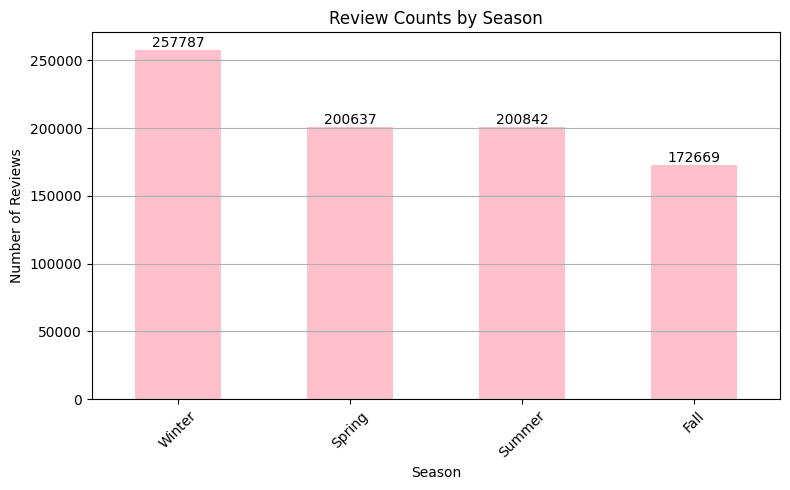

In [9]:
import matplotlib.pyplot as plt

# Function to map month to season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)
df['year'] = df['timestamp'].dt.year
season_counts = df.groupby('season').size()

season_counts = season_counts.reindex(['Winter', 'Spring', 'Summer', 'Fall'])

plt.figure(figsize=(8, 5))
ax = season_counts.plot(kind='bar', color='pink')

for i, count in enumerate(season_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Review Counts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [10]:
# Step 1: Filter for Winter
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)

winter_df = df[df['season'] == 'Winter']

# Step 2: Count parent_asin frequency in Winter
top_asin = winter_df['parent_asin'].value_counts().idxmax()
top_count = winter_df['parent_asin'].value_counts().max()

# Step 3: Match to title_y
titles = winter_df[winter_df['parent_asin'] == top_asin]['title_y'].unique()

# Step 4: Output result
print("Top Winter Item:")
print(f"Parent ASIN: {top_asin}")
print(f"Number of Winter Reviews: {top_count}")
print("Title(s):", titles)


Top Winter Item:
Parent ASIN: B09KHSM7BB
Number of Winter Reviews: 1026
Title(s): ["Russell Athletic Men's Dri-Power Fleece Hoodies & Sweatshirts, Moisture Wicking, Cotton Blend, Relaxed Fit, Sizes S-4X"]


In [11]:
# Get top 5 parent_asins
top5_asins = winter_df['parent_asin'].value_counts().head(5)

# Print title for each
for asin in top5_asins.index:
    titles = winter_df[winter_df['parent_asin'] == asin]['title_y'].unique()
    print(f"\nASIN: {asin} (Count: {top5_asins[asin]})")
    print("Title(s):", titles)


ASIN: B09KHSM7BB (Count: 1026)
Title(s): ["Russell Athletic Men's Dri-Power Fleece Hoodies & Sweatshirts, Moisture Wicking, Cotton Blend, Relaxed Fit, Sizes S-4X"]

ASIN: B09TXZHKLG (Count: 905)
Title(s): ['Casio F91W-1 Classic Resin Strap Digital Sport Watch']

ASIN: B07VPGY6FX (Count: 805)
Title(s): ['OZERO Waterproof Winter Gloves Men Women -30 ℉ Cold Proof Touchscreen Anti Slip Silicon Palm - Heated Glove Thermal for Driving Cycling Motorcycle in Cold Weather Warmest Gifts for Dad']

ASIN: B09QFJGKM5 (Count: 696)
Title(s): ['Copper Fit Energy Unisex Easy-On/Easy-Off Knee High Compression Socks']

ASIN: B09M6X79V9 (Count: 599)
Title(s): ["NELEUS Women's 3 Pack Compression Base Layer Dry Fit Tank Top"]


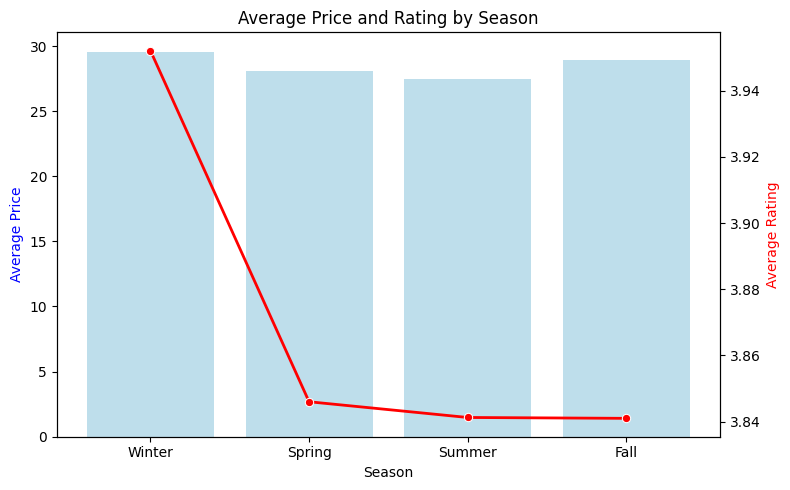

In [12]:
import seaborn as sns

# --- Step 1: Ensure timestamp is datetime and season exists ---
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
def get_season(date):
    if pd.isnull(date):
        return None
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)

# --- Step 2: Compute average price and rating per season ---
season_summary = (
    df.groupby('season')
      .agg(avg_price=('price', 'mean'),
           avg_rating=('rating', 'mean'))
      .reset_index()
)

# --- Step 3: Sort seasons in order ---
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_summary['season'] = pd.Categorical(season_summary['season'], categories=season_order, ordered=True)
season_summary = season_summary.sort_values('season')

# --- Step 4: Plot on same chart (dual y-axis) ---
fig, ax1 = plt.subplots(figsize=(8,5))

# Plot average price (left y-axis)
sns.barplot(x='season', y='avg_price', data=season_summary, ax=ax1, color='skyblue', alpha=0.6)
ax1.set_ylabel('Average Price', color='blue')
ax1.set_xlabel('Season')

# Create twin axis for rating
ax2 = ax1.twinx()
sns.lineplot(x='season', y='avg_rating', data=season_summary, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Average Rating', color='red')

plt.title('Average Price and Rating by Season')
plt.tight_layout()
plt.show()

/var/folders/v_/lysk6p5x5xx3xpwld40tdfgr0000gn/T/ipykernel_9869/2882570723.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


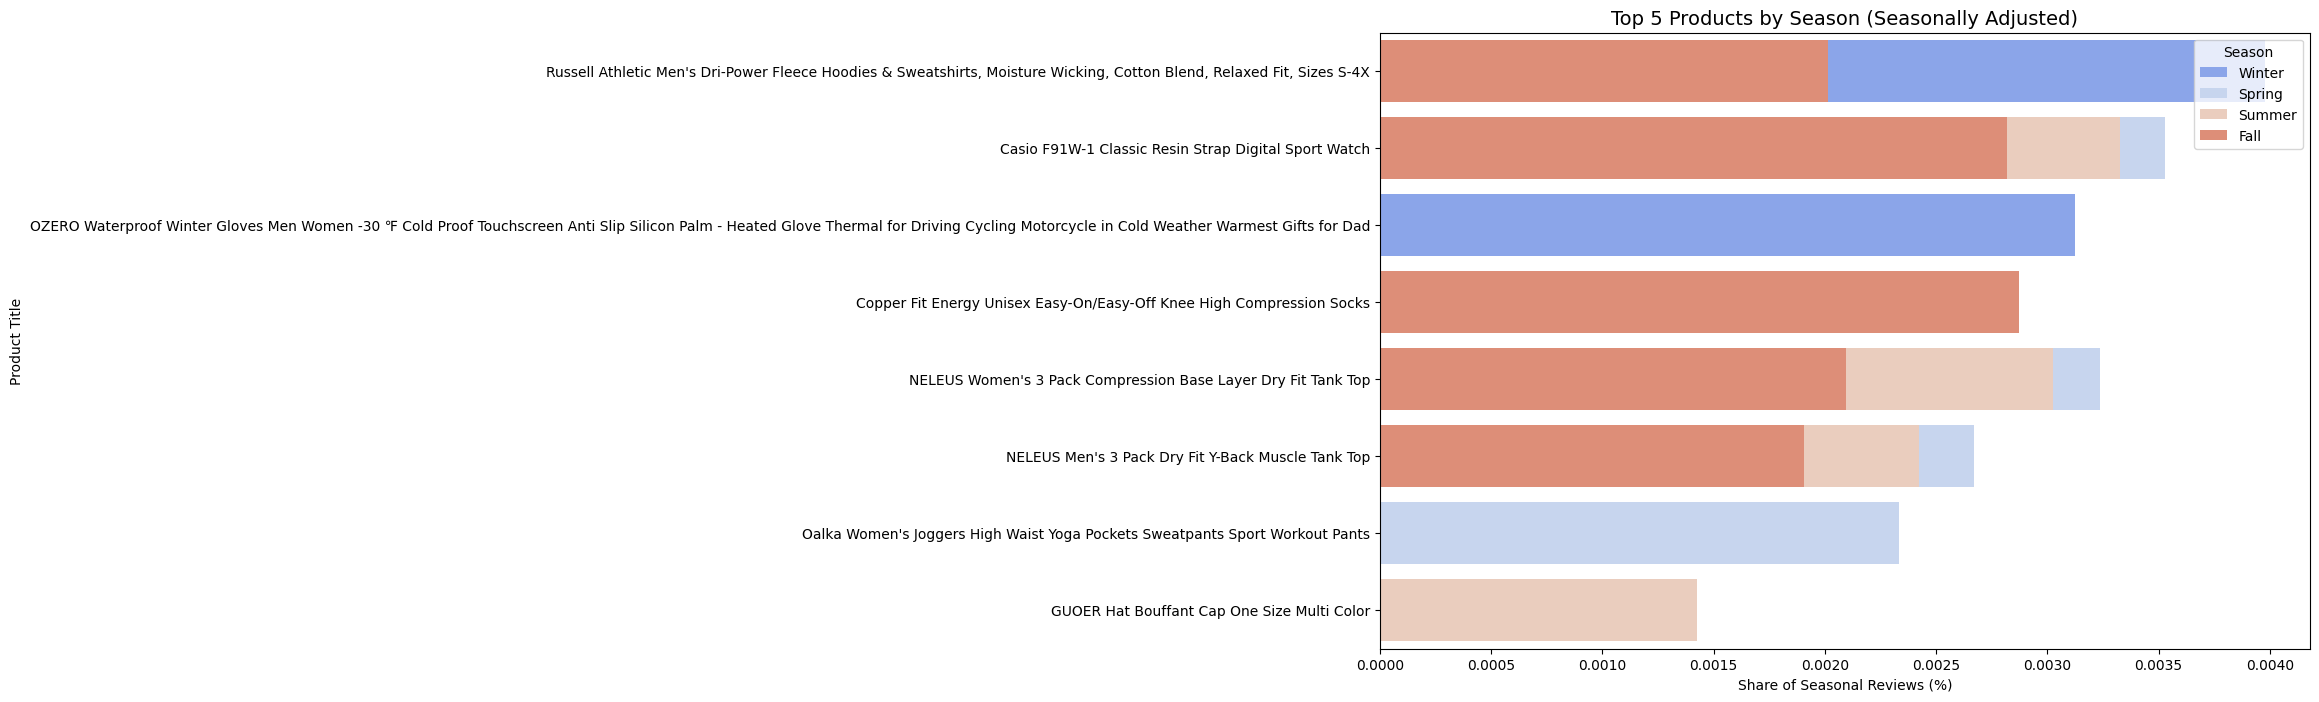

In [13]:
def get_season(date):
    if pd.isnull(date):
        return None
    m = date.month
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)

# --- Step 2: Count reviews per season and per product ---
season_counts = (
    df.groupby(['season', 'parent_asin'])
      .size()
      .reset_index(name='review_count')
)

# --- Step 3: Seasonally adjust (normalize within each season) ---
# This makes values relative to total seasonal activity
total_reviews_per_season = season_counts.groupby('season')['review_count'].transform('sum')
season_counts['seasonal_share'] = season_counts['review_count'] / total_reviews_per_season

# --- Step 4: Get top 5 products by adjusted share per season ---
top5_per_season = (
    season_counts.sort_values(['season', 'seasonal_share'], ascending=[True, False])
    .groupby('season')
    .head(5)
)

# --- Step 5: Get product titles for clarity ---
titles = df[['parent_asin', 'title_y']].drop_duplicates()
top5_per_season = top5_per_season.merge(titles, on='parent_asin', how='left')

# --- Step 6: Order seasons ---
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
top5_per_season['season'] = pd.Categorical(top5_per_season['season'], categories=season_order, ordered=True)
top5_per_season = top5_per_season.sort_values(['season', 'seasonal_share'], ascending=[True, False])

# --- Step 7: Visualize ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top5_per_season,
    x='seasonal_share',
    y='title_y',
    hue='season',
    dodge=False,
    palette='coolwarm'
)
plt.title('Top 5 Products by Season (Seasonally Adjusted)', fontsize=14)
plt.xlabel('Share of Seasonal Reviews (%)')
plt.ylabel('Product Title')
plt.legend(title='Season', loc='upper right')
plt.tight_layout()
plt.show()


/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 



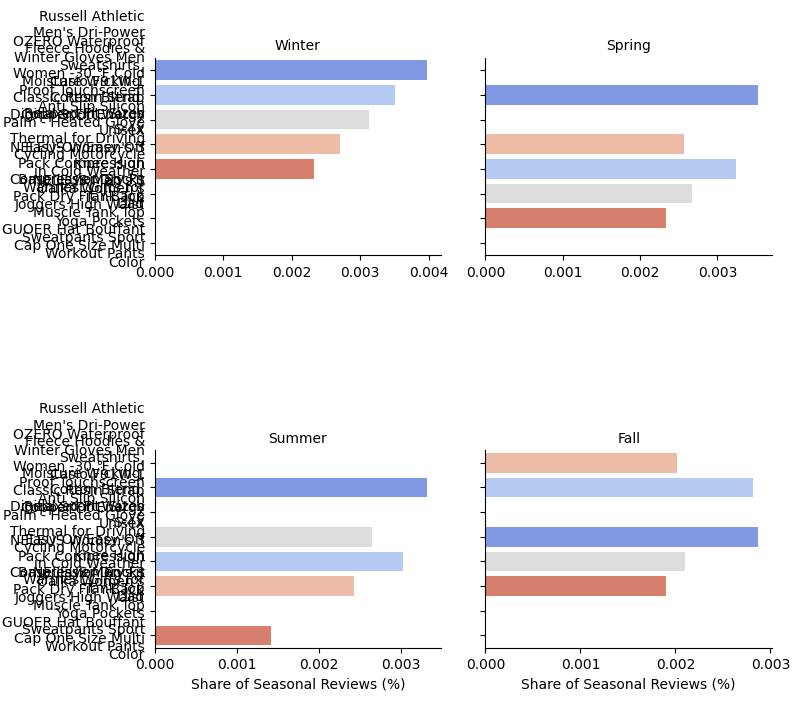

In [14]:

g = sns.FacetGrid(
    top5_per_season, 
    col='season', 
    col_wrap=2, 
    sharex=False, 
    height=4,
    col_order=['Winter','Spring','Summer','Fall']
)
g.map_dataframe(
    sns.barplot, 
    y='title_y', 
    x='seasonal_share', 
    palette='coolwarm', 
    dodge=False
)
g.set_titles("{col_name}")
g.set_axis_labels("Share of Seasonal Reviews (%)", "")
for ax in g.axes.flat:
    for label in ax.get_yticklabels():
        label.set_wrap(True)
plt.tight_layout()
plt.show()


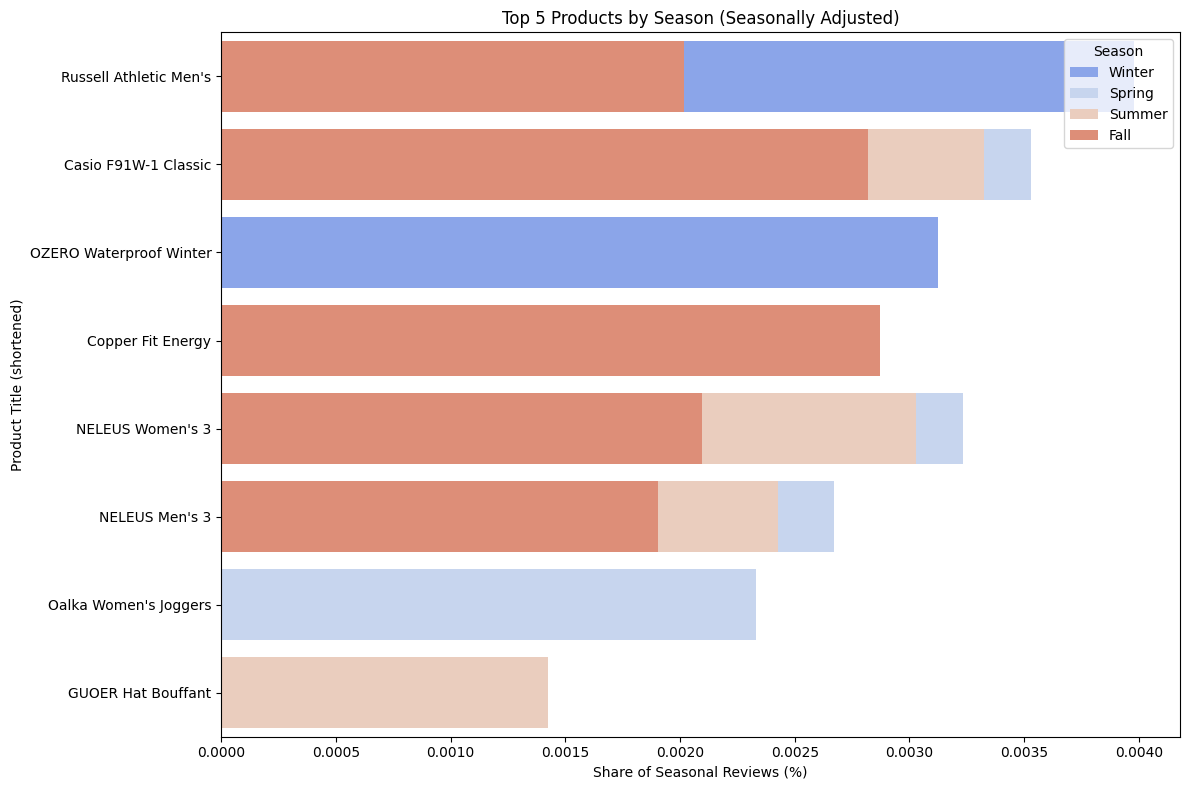

In [15]:
top5_per_season['short_title'] = top5_per_season['title_y'].apply(lambda x: ' '.join(str(x).split()[:3]))

# Then update your plot to use 'short_title' instead of 'title_y'
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top5_per_season,
    x='seasonal_share',
    y='short_title',
    hue='season',
    dodge=False,
    palette='coolwarm'
)
plt.title('Top 5 Products by Season (Seasonally Adjusted)')
plt.xlabel('Share of Seasonal Reviews (%)')
plt.ylabel('Product Title (shortened)')
plt.legend(title='Season', loc='upper right')
plt.tight_layout()
plt.show()


## New Section for NLP Analysis

In [16]:
df_copy = df.copy()
df_copy

rating                             title_x  \
0          5.0                       Pretty locket   
1          5.0                                   A   
2          3.0  Adult friendly; Not for small kids   
3          5.0                   Bright and summer   
4          5.0                 My Kid loves these!   
...        ...                                 ...   
831930     5.0                        Great piece!   
831931     1.0                            You suck   
831932     1.0                                  Ok   
831933     5.0                      100% Recommend   
831934     5.0                         Great value   

                                                     text images_x  \
0       I think this locket is really pretty. The insi...       []   
1                                                   Great       []   
2       Works OK for adults and is not at all kid frie...       []   
3       What a cute top! Cam wait to wear in warm weat...       []   
4       My son is a big Ninjago fan and these are perf...       []   
...                                                   ...      ...   
831930                                        Super cute!       []   
831931  Y’all took to damn long I got it may 18th and ...       []   
831932         It should have had enshrined on both sides       []   
831933  I bought this for my mom for Mother’s Day she ...       []   
831934                                        Great piece       []   

              asin parent_asin                       user_id  \
0       B00LOPVX74  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ   
1       B07B4JXK8D  B07B4JXK8D  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ   
2       B089S8MFCQ  B089S8MFCQ  AHTTU2FL6FCNBBAESCJHOHHSSW7A   
3       B087M39LVV  B087M39LVV  AEQAYV7RXZEBXMQIQPL6KCT2CFWQ   
4       B091GMMYPS  B091GMMYPS  AEVPPTMG43C6GWSR7I2UGRQN7WFQ   
...            ...         ...                           ...   
831930  B07HF4GDWS  B07HF4F6LP  AG4N46GFOECH7THIIQWVBVKCIS2Q   
831931  B07HF4GDWS  B07HF4F6LP  AGUGFDHYUKELUZTJU3373XO2QVGA   
831932  B07HF4GDWS  B07HF4F6LP  AH7PTXXCYHBGJN2KMKMTGI6NBV4A   
831933  B07HF4GDWS  B07HF4F6LP  AH7Q2PTD6CLQVTLM6MQCYWP5ZOVA   
831934  B07HF4GDWS  B07HF4F6LP  AF3ZQRB4BK2S4TZ2LF4API7NXEMQ   

                     timestamp  helpful_vote  verified_purchase  ...  \
0      2020-01-09 00:06:34.489             3               True  ...   
1      2020-12-20 01:04:06.701             0               True  ...   
2      2020-10-21 18:58:06.690             0               True  ...   
3      2022-01-20 23:38:14.143             0               True  ...   
4      2022-02-04 18:48:28.824             0               True  ...   
...                        ...           ...                ...  ...   
831930 2021-05-30 23:42:42.440             0               True  ...   
831931 2020-05-18 21:22:06.602             0               True  ...   
831932 2021-02-10 19:54:42.236             0               True  ...   
831933 2020-07-16 17:43:12.373             0               True  ...   
831934 2020-10-16 12:54:43.196             0               True  ...   

                                              description  price  \
0       ["This beautiful jewelry would be a great addi...  30.00   
1       ["Anyone looking for the best in single tread ...  20.99   
2                                                      []    NaN   
3                                                      []    NaN   
4                                                      []    NaN   
...                                                   ...    ...   
831930  ['Charmed Craft Mother Mom Love Child Charms E...   9.99   
831931  ['Charmed Craft Mother Mom Love Child Charms E...   9.99   
831932  ['Charmed Craft Mother Mom Love Child Charms E...   9.99   
831933  ['Charmed Craft Mother Mom Love Child Charms E...   9.99   
831934  ['Charmed Craft Mother Mom Love Child Charms E...   9.99   

                                                 images_y  \
0     

In [17]:
%pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


def clean_text(text):
    """
    Clean text by removing special characters, converting to lowercase, etc.
    """
    if pd.isna(text):
        return ""
    text = text.lower() # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip() # remove extra whitespace
    cleaned = text 
    return cleaned

stop_words = set(stopwords.words('english'))

def tokenize_and_filter(text):
    """
    Tokenize text and remove stopwords.
    """
    if not text:
        return []
    tokens = word_tokenize(text)
    filtered_tokens = [t.lower() for t in tokens if t.isalpha() and t.lower() not in stop_words]
    return filtered_tokens

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Setup complete!")

def clean_text(text):
    """
    Clean text by removing special characters, converting to lowercase, etc.
    """
    if pd.isna(text):
        return ""
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    cleaned = text
    return cleaned

df_copy['cleaned_text'] = df_copy['text'].apply(clean_text)

df_copy = df_copy[df_copy['cleaned_text'].apply(lambda x: len(x.split()) >= 2)]

# df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='s', errors='coerce')

df_copy.head()

[nltk_data] Downloading package punkt to /Users/fuguan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fuguan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fuguan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Setup complete!


rating                             title_x  \
0     5.0                       Pretty locket   
2     3.0  Adult friendly; Not for small kids   
3     5.0                   Bright and summer   
4     5.0                 My Kid loves these!   
5     2.0               Not what was expected   

                                                text images_x        asin  \
0  I think this locket is really pretty. The insi...       []  B00LOPVX74   
2  Works OK for adults and is not at all kid frie...       []  B089S8MFCQ   
3  What a cute top! Cam wait to wear in warm weat...       []  B087M39LVV   
4  My son is a big Ninjago fan and these are perf...       []  B091GMMYPS   
5  There are lots of raw edges.  Not well made.  ...       []  B09DQ5M2BB   

  parent_asin                       user_id               timestamp  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ 2020-01-09 00:06:34.489   
2  B089S8MFCQ  AHTTU2FL6FCNBBAESCJHOHHSSW7A 2020-10-21 18:58:06.690   
3  B087M39LVV  AEQAYV7RXZEBXMQIQPL6KCT2CFWQ 2022-01-20 23:38:14.143   
4  B091GMMYPS  AEVPPTMG43C6GWSR7I2UGRQN7WFQ 2022-02-04 18:48:28.824   
5  B09DQ5M2BB  AHREXOGQPZDA6354MHH4ETSF3MCQ 2021-10-21 04:50:43.960   

   helpful_vote  verified_purchase  ... price  \
0             3               True  ...  30.0   
2             0               True  ...   NaN   
3             0               True  ...   NaN   
4             0               True  ...   NaN   
5             1               True  ...   NaN   

                                            images_y  \
0  [{'thumb': 'https://m.media-amazon.com/images/...   
2  [{'thumb': 'https://m.media-amazon.com/images/...   
3  [{'thumb': 'https://m.media-amazon.com/images/...   
4  [{'thumb': 'https://m.media-amazon.com/images/...   
5  [{'thumb': 'https://m.media-amazon.com/images/...   

                                              videos        store categories  \
0  [{'title': 'Irish Locket Celtic Locket Necklac...      CHUVORA         []   
2                                                 []  Kranchungel         []   
3                                                 []    Twotwowin         []   
4                                                 []    Melitolay         []   
5                                                 []     snugwind         []   

                                             details  word_count  season  \
0  {'Is Discontinued By Manufacturer': 'No', 'Pro...          58  Winter   
2  {'Package Dimensions': '5.7 x 4.6 x 0.85 inche...          20    Fall   
3  {'Package Dimensions': '13.54 x 9.06 x 1.33 in...          13  Winter   
4  {'Brand': 'Melitolay', 'Material': 'Polyester'...          78  Winter   
5  {'Package Dimensions': '14.48 x 11.06 x 1.81 i...          29    Fall   

   year                                       cleaned_text  
0  2020  i think this locket is really pretty the insid...  
2  2020  works ok for adults and is not at all kid frie...  
3  2022  what a cute top cam wait to wear in warm weath...  
4  2022  my son is a big ninjago fan and these are perf...  
5  2021  there are lots of raw edges not well made not ...  

[5 rows x 26 columns]

In [19]:
from collections import Counter
# find most common words in cleaned_text for winter season

stop_words = {
    'the', 'i', 'and', 'a', 'it', 'of', 'to', 'in', 'for', 'on', 'with', 'as', 
    'at', 'by', 'an', 'that', 'which', 'who', 'is', 'are', 'but', 'this', 
    'was', 'my', 'be', 'or', 'not', 'have', 'had', 'will', 'would', 'there', 
    'how', 'we', 'you', 'he', 'she', 'they', 'been', 'has', 'had', 'do', 'does', 
    'doing', 'did', 'doing', 'shall', 'should', 'could', 'their', 'ours', 
    'yours', 'them', 'your', 'his', 'hers', 'its', 'our', 'us', 'all', 'each', 
    'some', 'such', 'no', 'nor', 'not', 'under', 'over', 'up', 'down', 'out', 
    'into', 'from', 'during', 'before', 'after', 'above', 'below', 'while', 
    'among', 'between', 'both', 'few', 'more', 'most', 'less', 'least', 'own', 
    'other', 'another', 'this', 'that', 'these', 'those', 'a', 'an', 'which', 
    'who', 'whom', 'how', 'where', 'when', 'why', 'can', 'will', 'just', 
    'than', 'so', 'because', 'like', 'than', 'being', 'having'
}

winter_df = df_copy[df_copy['season'] == 'Winter']  
spring_df = df_copy[df_copy['season'] == 'Spring']
summer_df = df_copy[df_copy['season'] == 'Summer']
fall_df = df_copy[df_copy['season'] == 'Fall']

# ----------------------------

# top 5 words winter
winter_words = ' '.join(winter_df['cleaned_text']).split()
filtered_winter_words = [word for word in winter_words if word.lower() not in stop_words]
winter_word_counts = Counter(filtered_winter_words)
winter_top10 = winter_word_counts.most_common(10)
print("Top 10 words in Winter:", winter_top10)

# top 5 words spring
spring_words = ' '.join(spring_df['cleaned_text']).split()
filtered_spring_words = [word for word in spring_words if word.lower() not in stop_words]
spring_word_counts = Counter(filtered_spring_words)
spring_top10 = spring_word_counts.most_common(10)
print("Top 10 words in Spring:", spring_top10)

# top 5 words summer
summer_words = ' '.join(summer_df['cleaned_text']).split()
filtered_summer_words = [word for word in summer_words if word.lower() not in stop_words]
summer_word_counts = Counter(filtered_summer_words)
summer_top10 = summer_word_counts.most_common(10)
print("Top 10 words in Summer:", summer_top10)

# top 5 words fall
fall_words = ' '.join(fall_df['cleaned_text']).split()
filtered_fall_words = [word for word in fall_words if word.lower() not in stop_words]
fall_word_counts = Counter(filtered_fall_words)
fall_top10 = fall_word_counts.most_common(10)
print("Top 10 words in Fall:", fall_top10)

Top 10 words in Winter: [('very', 57060), ('great', 41248), ('fit', 39632), ('love', 36669), ('size', 32800), ('good', 27882), ('too', 26272), ('quality', 25707), ('nice', 24755), ('wear', 24509)]
Top 10 words in Spring: [('very', 43916), ('fit', 31899), ('love', 31261), ('great', 31208), ('size', 27767), ('too', 21863), ('good', 21375), ('wear', 20060), ('small', 19208), ('quality', 18730)]
Top 10 words in Summer: [('very', 44732), ('fit', 33200), ('great', 31648), ('love', 31383), ('size', 28972), ('too', 22447), ('good', 21577), ('wear', 21277), ('comfortable', 20255), ('one', 18903)]
Top 10 words in Fall: [('very', 39588), ('fit', 29218), ('great', 27920), ('size', 25362), ('love', 25267), ('good', 19895), ('too', 19871), ('wear', 19145), ('quality', 17327), ('comfortable', 17203)]


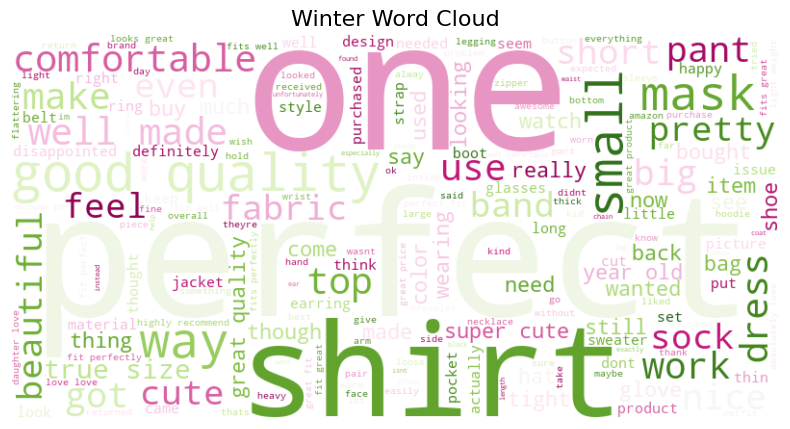

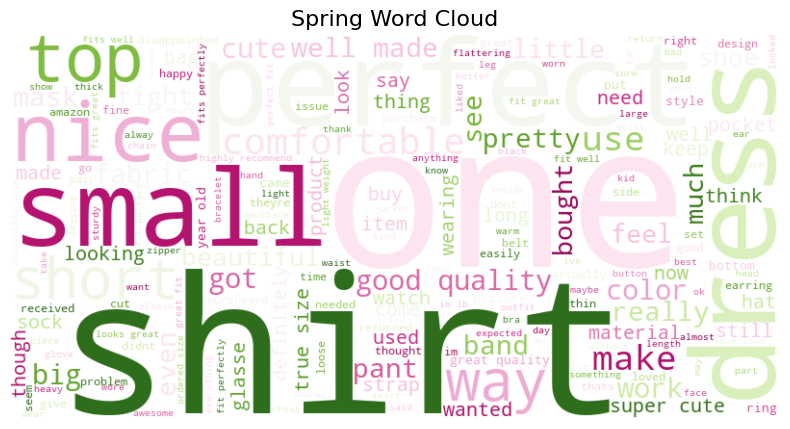

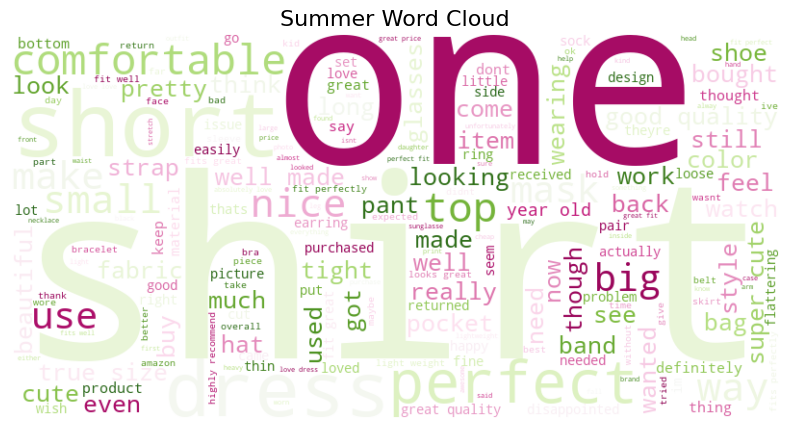

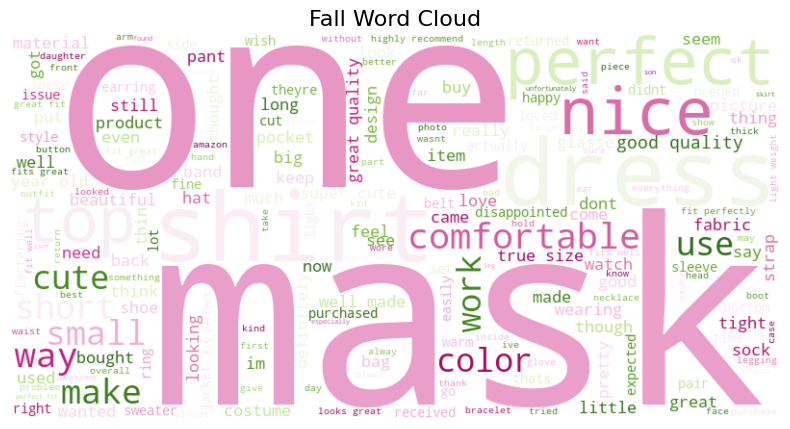

In [20]:
# word clouds for each season
def generate_wordcloud(text, title):
    # use a pink-green diverging colormap
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='PiYG').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show() 

generate_wordcloud(' '.join(filtered_winter_words), 'Winter Word Cloud')
generate_wordcloud(' '.join(filtered_spring_words), 'Spring Word Cloud')
generate_wordcloud(' '.join(filtered_summer_words), 'Summer Word Cloud')
generate_wordcloud(' '.join(filtered_fall_words), 'Fall Word Cloud')

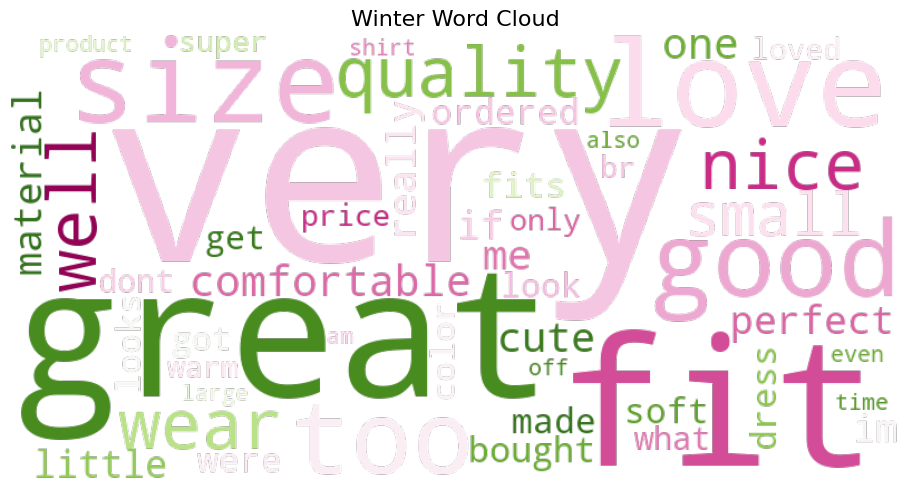

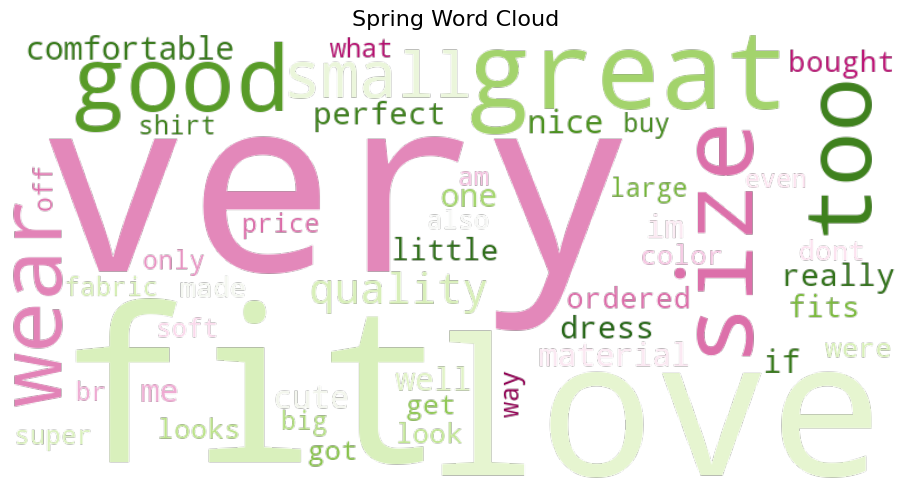

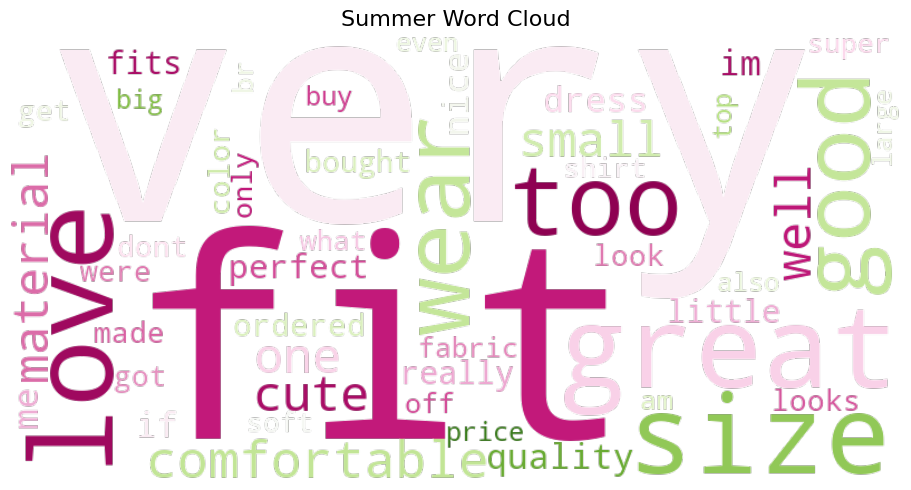

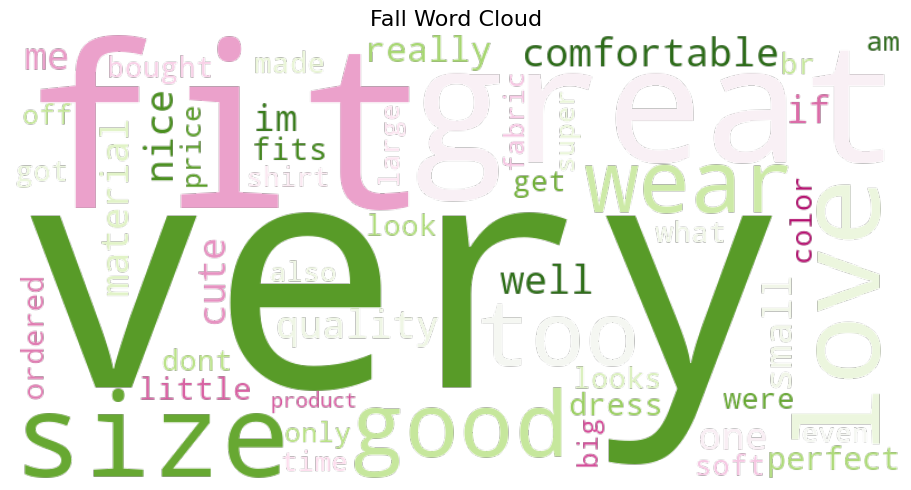

In [21]:
# word clouds for each season (top 50 words only)
def generate_wordcloud_top_n(words_list, title, top_n=50):
    top_freq = dict(Counter(words_list).most_common(top_n))
    wc = WordCloud(width=800, height=400, background_color=None, mode='RGBA', colormap='PiYG')
    wc = wc.generate_from_frequencies(top_freq)
    plt.figure(figsize=(10, 5), facecolor='none')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

generate_wordcloud_top_n(filtered_winter_words, 'Winter Word Cloud')
generate_wordcloud_top_n(filtered_spring_words, 'Spring Word Cloud')
generate_wordcloud_top_n(filtered_summer_words, 'Summer Word Cloud')
generate_wordcloud_top_n(filtered_fall_words,   'Fall Word Cloud')

In [22]:
# average word length for reviews per season

def average_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)    

average_word_length(winter_df['cleaned_text'].str.cat(sep=' '))

4.145233106025846

In [23]:
average_word_length(spring_df['cleaned_text'].str.cat(sep=' '))

4.1365277946749215

In [24]:
average_word_length(summer_df['cleaned_text'].str.cat(sep=' '))


4.135829385851483

In [25]:
average_word_length(fall_df['cleaned_text'].str.cat(sep=' '))

4.135985285680807

In [26]:
# Find unique words in each season

winter_unique = set(filtered_winter_words)
spring_unique = set(filtered_spring_words)
summer_unique = set(filtered_summer_words)
fall_unique = set(filtered_fall_words) 

# top 10 unique words in each season
print("Top 10 unique words in Winter:", list(winter_unique)[:10])
print("Top 10 unique words in Spring:", list(spring_unique)[:10])
print("Top 10 unique words in Summer:", list(summer_unique)[:10])
print("Top 10 unique words in Fall:", list(fall_unique)[:10])

Top 10 unique words in Winter: ['louderbr', 'lke', 'trouble', 'embarrassmentbr', 'jobhowever', 'ironingbr', 'allencoco', 'slimming', 'cheapthinbr', 'thready']
Top 10 unique words in Spring: ['louderbr', 'kidsbut', 'trouble', 'embarrassmentbr', 'ironingbr', 'slimming', 'shapesreally', 'wayid', 'oil', 'somewhere']
Top 10 unique words in Summer: ['lke', 'trouble', 'embarrassmentbr', 'ironingbr', 'slimming', 'httpswwwamazoncomblueblockingamberglassessleepdpbgsftxrefsrdchildkeywordsbiorhythmglassesqidsrbr', 'thready', 'oil', 'somewhere', 'laceez']
Top 10 unique words in Fall: ['lke', 'trouble', 'chorros', 'embarrassmentbr', 'slimming', 'thready', 'oil', 'somewhere', 'laceez', 'stay']


In [27]:
# sentimment analysis per season
sia = SentimentIntensityAnalyzer()

df_copy['sentiment'] = df_copy['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_copy.head()

rating                             title_x  \
0     5.0                       Pretty locket   
2     3.0  Adult friendly; Not for small kids   
3     5.0                   Bright and summer   
4     5.0                 My Kid loves these!   
5     2.0               Not what was expected   

                                                text images_x        asin  \
0  I think this locket is really pretty. The insi...       []  B00LOPVX74   
2  Works OK for adults and is not at all kid frie...       []  B089S8MFCQ   
3  What a cute top! Cam wait to wear in warm weat...       []  B087M39LVV   
4  My son is a big Ninjago fan and these are perf...       []  B091GMMYPS   
5  There are lots of raw edges.  Not well made.  ...       []  B09DQ5M2BB   

  parent_asin                       user_id               timestamp  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ 2020-01-09 00:06:34.489   
2  B089S8MFCQ  AHTTU2FL6FCNBBAESCJHOHHSSW7A 2020-10-21 18:58:06.690   
3  B087M39LVV  AEQAYV7RXZEBXMQIQPL6KCT2CFWQ 2022-01-20 23:38:14.143   
4  B091GMMYPS  AEVPPTMG43C6GWSR7I2UGRQN7WFQ 2022-02-04 18:48:28.824   
5  B09DQ5M2BB  AHREXOGQPZDA6354MHH4ETSF3MCQ 2021-10-21 04:50:43.960   

   helpful_vote  verified_purchase  ...  \
0             3               True  ...   
2             0               True  ...   
3             0               True  ...   
4             0               True  ...   
5             1               True  ...   

                                            images_y  \
0  [{'thumb': 'https://m.media-amazon.com/images/...   
2  [{'thumb': 'https://m.media-amazon.com/images/...   
3  [{'thumb': 'https://m.media-amazon.com/images/...   
4  [{'thumb': 'https://m.media-amazon.com/images/...   
5  [{'thumb': 'https://m.media-amazon.com/images/...   

                                              videos        store  categories  \
0  [{'title': 'Irish Locket Celtic Locket Necklac...      CHUVORA          []   
2                                                 []  Kranchungel          []   
3                                                 []    Twotwowin          []   
4                                                 []    Melitolay          []   
5                                                 []     snugwind          []   

                                             details word_count  season  year  \
0  {'Is Discontinued By Manufacturer': 'No', 'Pro...         58  Winter  2020   
2  {'Package Dimensions': '5.7 x 4.6 x 0.85 inche...         20    Fall  2020   
3  {'Package Dimensions': '13.54 x 9.06 x 1.33 in...         13  Winter  2022   
4  {'Brand': 'Melitolay', 'Material': 'Polyester'...         78  Winter  2022   
5  {'Package Dimensions': '14.48 x 11.06 x 1.81 i...         29    Fall  2021   

                                        cleaned_text sentiment  
0  i think this locket is really pretty the insid...    0.8532  
2  works ok for adults and is not at all kid frie...    0.6597  
3  what a cute top cam wait to wear in warm weath...    0.8176  
4  my son is a big ninjago fan and these are perf...    0.9517  
5  there are lots of raw edges not well made not ...    0.0577  

[5 rows x 27 columns]

In [28]:
# average sentiment per season
winter_sentiment_avg = df_copy[df_copy['season'] == 'Winter']['sentiment'].mean()
print("Average Winter Sentiment:", winter_sentiment_avg)

fall_sentiment_avg = df_copy[df_copy['season'] == 'Fall']['sentiment'].mean()
print("Average Fall Sentiment:", fall_sentiment_avg)

spring_sentiment_avg = df_copy[df_copy['season'] == 'Spring']['sentiment'].mean()
print("Average Spring Sentiment:", spring_sentiment_avg)

summer_sentiment_avg = df_copy[df_copy['season'] == 'Summer']['sentiment'].mean()
print("Average Summer Sentiment:", summer_sentiment_avg)

Average Winter Sentiment: 0.4742278380582911
Average Fall Sentiment: 0.4570444288029527
Average Spring Sentiment: 0.4547072107704792
Average Summer Sentiment: 0.456389688260387


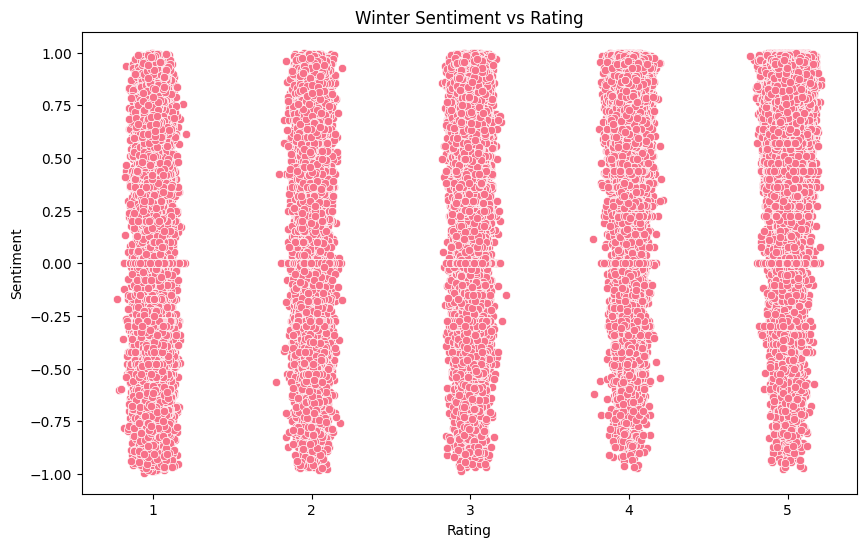

In [29]:
# winter sentiment plot (rating v sentiment)

jitter_strength = 0.05  # Control how much jitter you want
winter_sentiment = df_copy[df_copy['season'] == 'Winter']

winter_sentiment['jittered_rating'] = winter_sentiment['rating'] + np.random.normal(0, jitter_strength, size=len(winter_sentiment))

# Plotting with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=winter_sentiment, x='jittered_rating', y='sentiment')
plt.title('Winter Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()


In [30]:
# rating and sentiment
df_copy.groupby('rating')['sentiment'].mean()

rating
1.0   -0.077538
2.0    0.104327
3.0    0.280799
4.0    0.547908
5.0    0.667311
Name: sentiment, dtype: float64

In [31]:
# lowest and highest values in timestamp

df_copy['timestamp'].min(), df_copy['timestamp'].max()


(Timestamp('2020-01-01 00:00:18.377000'),
 Timestamp('2023-09-11 03:24:38.515000'))

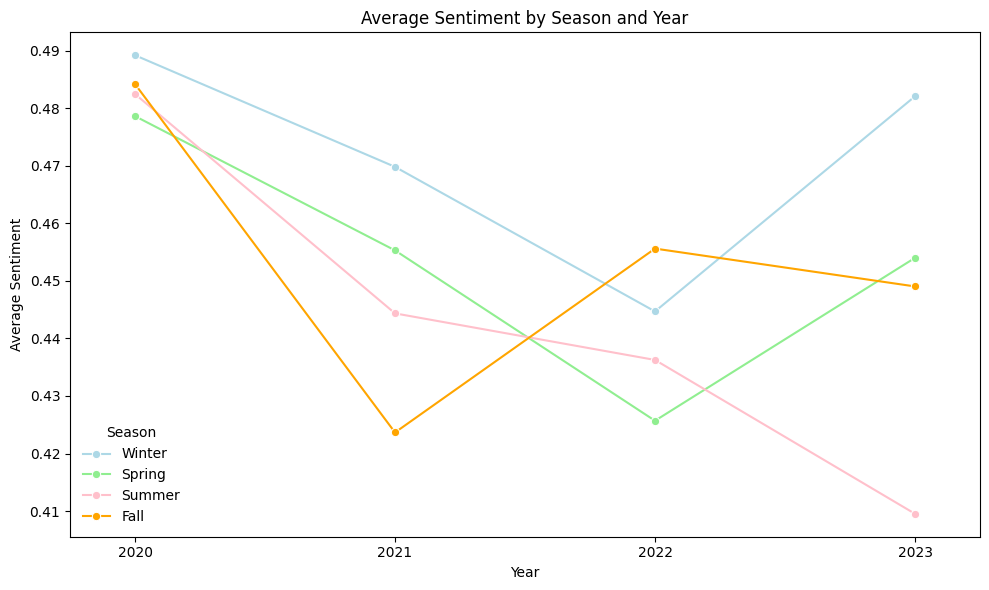

In [32]:
# plot sentiment for each season over years 
season_year_sentiment = df_copy.groupby(['season', 'year'])['sentiment'].mean().reset_index()

# Ensure seasons are in a consistent order and years sorted
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_year_sentiment['season'] = pd.Categorical(season_year_sentiment['season'], categories=season_order, ordered=True)
season_year_sentiment = season_year_sentiment.sort_values(['season', 'year'])

# Color mapping: winter blue, fall orange, spring green, summer pink
color_map = {'Winter': 'lightblue', 'Fall': 'orange', 'Spring': 'lightgreen', 'Summer': 'pink'}
palette = [color_map[s] for s in season_order]

fig, ax = plt.subplots(figsize=(10, 6))

# Make background transparent
fig.patch.set_alpha(0)     # figure background transparent
ax.set_facecolor('none')   # axes background transparent
plt.rcParams['savefig.transparent'] = True

sns.lineplot(
    data=season_year_sentiment,
    x='year',
    y='sentiment',
    hue='season',
    hue_order=season_order,
    palette=palette,
    marker='o',
    ax=ax
)

# Force x-axis to only show 2020-2023
years = [2020, 2021, 2022, 2023]
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.set_xlim(min(years) - 0.25, max(years) + 0.25)

plt.title('Average Sentiment by Season and Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
leg = plt.legend(title='Season')
if leg:
    leg.get_frame().set_alpha(0)  # legend box transparent
plt.tight_layout()
plt.show()

In [33]:
df_copy.groupby(['season', 'rating'])['sentiment'].mean()


season  rating
Fall    1.0      -0.080972
        2.0       0.106357
        3.0       0.277864
        4.0       0.552608
        5.0       0.670642
Spring  1.0      -0.080745
        2.0       0.109011
        3.0       0.279722
        4.0       0.546972
        5.0       0.666307
Summer  1.0      -0.075697
        2.0       0.101648
        3.0       0.284776
        4.0       0.546538
        5.0       0.669138
Winter  1.0      -0.073692
        2.0       0.101128
        3.0       0.280476
        4.0       0.546490
        5.0       0.664592
Name: sentiment, dtype: float64

In [34]:
# lowest and highest sentiment reviews

lowest_sentiment_review = df_copy.loc[df_copy['sentiment'].idxmin()]
print("Lowest Sentiment Review:")
print(lowest_sentiment_review[['cleaned_text', 'sentiment', 'rating', 'season']])

highest_sentiment_review = df_copy.loc[df_copy['sentiment'].idxmax()]
print("Highest Sentiment Review:")
print(highest_sentiment_review[['cleaned_text', 'sentiment', 'rating', 'season']])

Lowest Sentiment Review:
cleaned_text    shock clockbr as other reviewers have said i l...
sentiment                                                 -0.9952
rating                                                        1.0
season                                                       Fall
Name: 179099, dtype: object
Highest Sentiment Review:
cleaned_text    i grabbed these jousen mens boots fashion zipp...
sentiment                                                  0.9998
rating                                                        5.0
season                                                     Winter
Name: 5255, dtype: object


In [35]:
# lowest and highest sentiment reviews per season 

for season in season_order:
    season_df = df_copy[df_copy['season'] == season]
    lowest_review = season_df.loc[season_df['sentiment'].idxmin()]
    highest_review = season_df.loc[season_df['sentiment'].idxmax()]
    
    print(f"\n{season} Season:")
    print("Lowest Sentiment Review:")
    print(lowest_review[['cleaned_text', 'sentiment', 'rating']])
    print("Highest Sentiment Review:")
    print(highest_review[['cleaned_text', 'sentiment', 'rating']])      




Winter Season:
Lowest Sentiment Review:
cleaned_text    first off so upset this is the worst cosplay i...
sentiment                                                 -0.9948
rating                                                        1.0
Name: 308715, dtype: object
Highest Sentiment Review:
cleaned_text    i grabbed these jousen mens boots fashion zipp...
sentiment                                                  0.9998
rating                                                        5.0
Name: 5255, dtype: object

Spring Season:
Lowest Sentiment Review:
cleaned_text    its very uncomfortable i really tried hard to ...
sentiment                                                 -0.9907
rating                                                        1.0
Name: 792443, dtype: object
Highest Sentiment Review:
cleaned_text    this bracelet is cute and is supposed to help ...
sentiment                                                  0.9995
rating                                                    

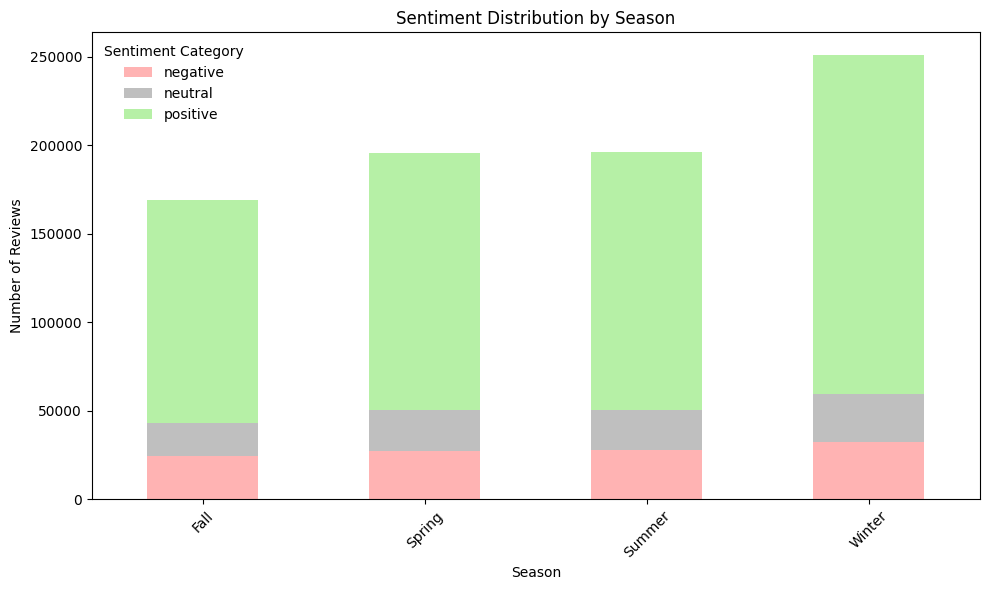

In [36]:
# number of positive, negative, neutral reviews per season (transparent background)
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
df_copy['sentiment_category'] = df_copy['sentiment'].apply(categorize_sentiment)
sentiment_counts = df_copy.groupby(['season', 'sentiment_category']).size().unstack(fill_value=0)

# Ensure consistent column order
sentiment_counts = sentiment_counts.reindex(columns=['negative', 'neutral', 'positive'])

# Colors: negative = light red, neutral = grey, positive = light green
colors = ['#ffb3b3', '#bfbfbf', '#b6f0a6']

# Plotting sentiment distribution per season with transparent background
plt.rcParams['savefig.transparent'] = True
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
fig.patch.set_alpha(0)      # figure background transparent
ax.set_facecolor('none')    # axes background transparent

sentiment_counts.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='none')
ax.set_title('Sentiment Distribution by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Number of Reviews')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

leg = ax.legend(title='Sentiment Category')
if leg:
    leg.get_frame().set_alpha(0)  # legend box transparent

plt.tight_layout()
plt.show()

In [37]:
# percentage of positive, negative, neutral reviews per season
sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
print(sentiment_percentage)


sentiment_category   negative    neutral   positive
season                                             
Fall                14.450570  11.003987  74.545444
Spring              14.056639  11.557953  74.385408
Summer              14.249717  11.334922  74.415361
Winter              12.806525  10.934845  76.258629


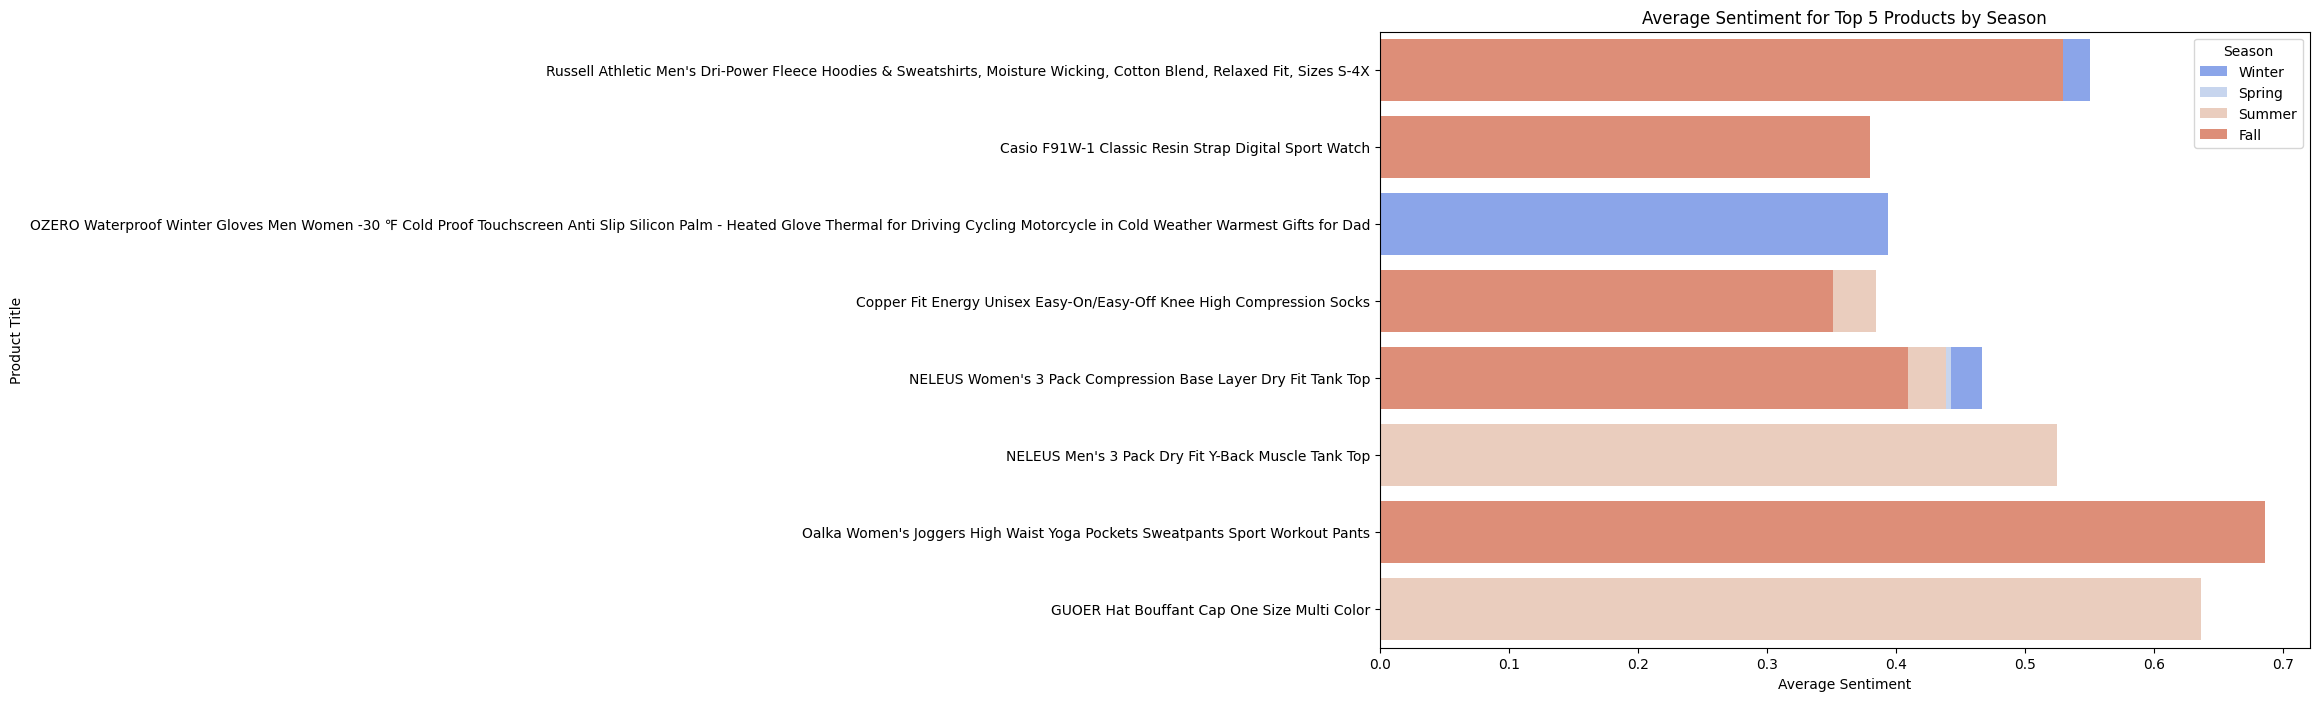

In [38]:
# sentiment for top 5 products per season

top5_per_season = (
    df_copy.groupby(['season', 'parent_asin'])
      .size()
      .reset_index(name='review_count')
)

top5_per_season = top5_per_season.sort_values(['season', 'review_count'], ascending=[True, False]).groupby('season').head(5)
top5_per_season = top5_per_season.merge(df_copy[['parent_asin', 'title_y']].drop_duplicates(), on='parent_asin', how='left')

top5_per_season['season'] = pd.Categorical(top5_per_season['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'], ordered=True)
top5_per_season = top5_per_season.sort_values(['season', 'review_count'], ascending=[True, False])

# Calculate average sentiment for each top product per season
avg_sentiments = []
for _, row in top5_per_season.iterrows():
    season = row['season']
    asin = row['parent_asin']
    avg_sentiment = df_copy[(df_copy['season'] == season) & (df_copy['parent_asin'] == asin)]['sentiment'].mean()
    avg_sentiments.append(avg_sentiment)
top5_per_season['avg_sentiment'] = avg_sentiments

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top5_per_season,
    x='avg_sentiment',
    y='title_y',
    hue='season',
    dodge=False,
    palette='coolwarm'
)
plt.title('Average Sentiment for Top 5 Products by Season')
plt.xlabel('Average Sentiment')
plt.ylabel('Product Title')
plt.legend(title='Season', loc='upper right')
plt.tight_layout()
plt.show()  


In [39]:
# correlation between rating and sentiment
correlation = df_copy['rating'].corr(df_copy['sentiment'])
print("Correlation between Rating and Sentiment:", correlation) 

Correlation between Rating and Sentiment: 0.6031873759829057


In [40]:
# correlation between rating and sentiment by season
seasonal_correlation = df_copy.groupby('season').apply(lambda x: x['rating'].corr(x['sentiment']))
print("Seasonal Correlation between Rating and Sentiment:")
print(seasonal_correlation) 

Seasonal Correlation between Rating and Sentiment:
season
Fall      0.602515
Spring    0.608109
Summer    0.604278
Winter    0.598162
dtype: float64


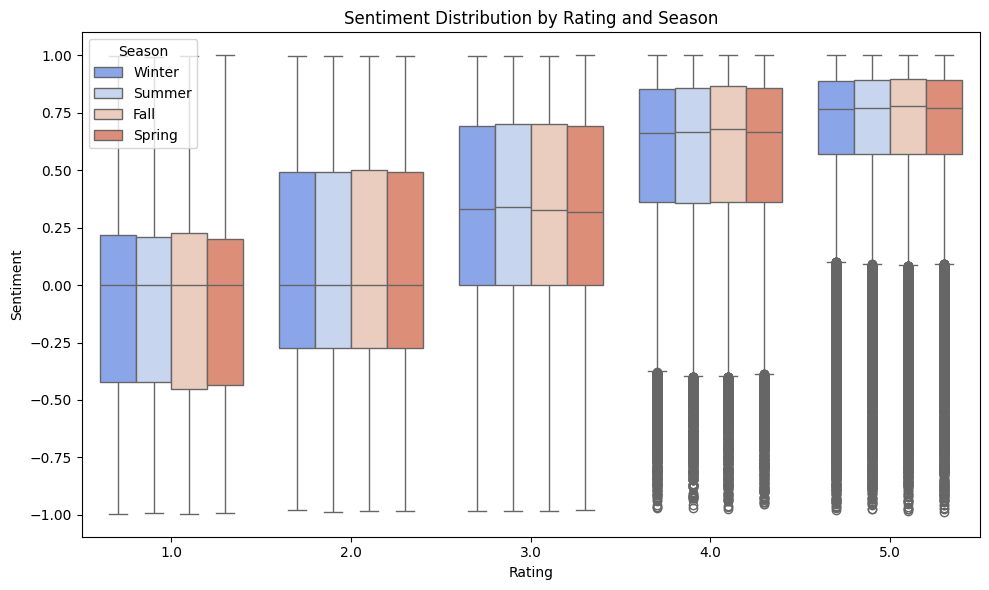

In [41]:
# correlation dot plot between rating and sentiment for seasons with transparent background
plt.rcParams['savefig.transparent'] = True
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
fig.patch.set_alpha(0)
ax.set_facecolor('none')

sns.boxplot(
    data=df_copy, x='rating', y='sentiment', hue='season',
    palette='coolwarm', ax=ax
)

plt.title('Sentiment Distribution by Rating and Season')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.legend(title='Season')
plt.tight_layout()
plt.show()



In [42]:
df_copy.head()

rating                             title_x  \
0     5.0                       Pretty locket   
2     3.0  Adult friendly; Not for small kids   
3     5.0                   Bright and summer   
4     5.0                 My Kid loves these!   
5     2.0               Not what was expected   

                                                text images_x        asin  \
0  I think this locket is really pretty. The insi...       []  B00LOPVX74   
2  Works OK for adults and is not at all kid frie...       []  B089S8MFCQ   
3  What a cute top! Cam wait to wear in warm weat...       []  B087M39LVV   
4  My son is a big Ninjago fan and these are perf...       []  B091GMMYPS   
5  There are lots of raw edges.  Not well made.  ...       []  B09DQ5M2BB   

  parent_asin                       user_id               timestamp  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ 2020-01-09 00:06:34.489   
2  B089S8MFCQ  AHTTU2FL6FCNBBAESCJHOHHSSW7A 2020-10-21 18:58:06.690   
3  B087M39LVV  AEQAYV7RXZEBXMQIQPL6KCT2CFWQ 2022-01-20 23:38:14.143   
4  B091GMMYPS  AEVPPTMG43C6GWSR7I2UGRQN7WFQ 2022-02-04 18:48:28.824   
5  B09DQ5M2BB  AHREXOGQPZDA6354MHH4ETSF3MCQ 2021-10-21 04:50:43.960   

   helpful_vote  verified_purchase  ...  \
0             3               True  ...   
2             0               True  ...   
3             0               True  ...   
4             0               True  ...   
5             1               True  ...   

                                              videos        store  categories  \
0  [{'title': 'Irish Locket Celtic Locket Necklac...      CHUVORA          []   
2                                                 []  Kranchungel          []   
3                                                 []    Twotwowin          []   
4                                                 []    Melitolay          []   
5                                                 []     snugwind          []   

                                             details word_count  season  year  \
0  {'Is Discontinued By Manufacturer': 'No', 'Pro...         58  Winter  2020   
2  {'Package Dimensions': '5.7 x 4.6 x 0.85 inche...         20    Fall  2020   
3  {'Package Dimensions': '13.54 x 9.06 x 1.33 in...         13  Winter  2022   
4  {'Brand': 'Melitolay', 'Material': 'Polyester'...         78  Winter  2022   
5  {'Package Dimensions': '14.48 x 11.06 x 1.81 i...         29    Fall  2021   

                                        cleaned_text sentiment  \
0  i think this locket is really pretty the insid...    0.8532   
2  works ok for adults and is not at all kid frie...    0.6597   
3  what a cute top cam wait to wear in warm weath...    0.8176   
4  my son is a big ninjago fan and these are perf...    0.9517   
5  there are lots of raw edges not well made not ...    0.0577   

  sentiment_category  
0           positive  
2           positive  
3           positive  
4           positive  
5           positive  

[5 rows x 28 columns]

In [43]:
# frequency of helpful votes per season per rating

helpful_votes_summary = df_copy.groupby(['season', 'rating'])['helpful_vote'].sum().reset_index()
helpful_votes_summary

season  rating  helpful_vote
0     Fall     1.0         14233
1     Fall     2.0          5516
2     Fall     3.0          7051
3     Fall     4.0         10118
4     Fall     5.0         40841
5   Spring     1.0         13076
6   Spring     2.0          5148
7   Spring     3.0          6902
8   Spring     4.0          8991
9   Spring     5.0         38465
10  Summer     1.0         14107
11  Summer     2.0          5795
12  Summer     3.0          7207
13  Summer     4.0         11026
14  Summer     5.0         47567
15  Winter     1.0         14879
16  Winter     2.0          6095
17  Winter     3.0          7800
18  Winter     4.0         11478
19  Winter     5.0         45189

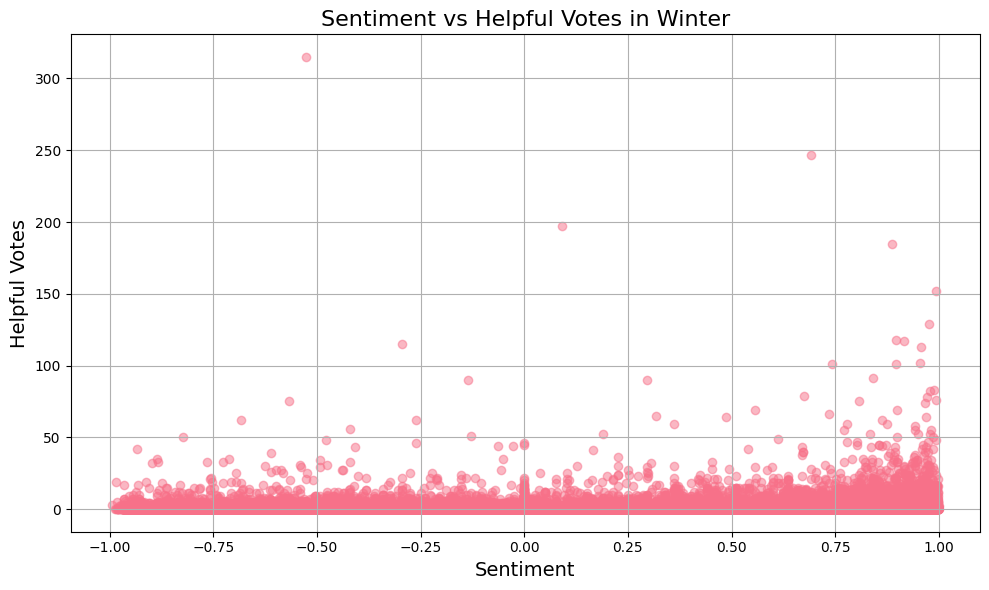

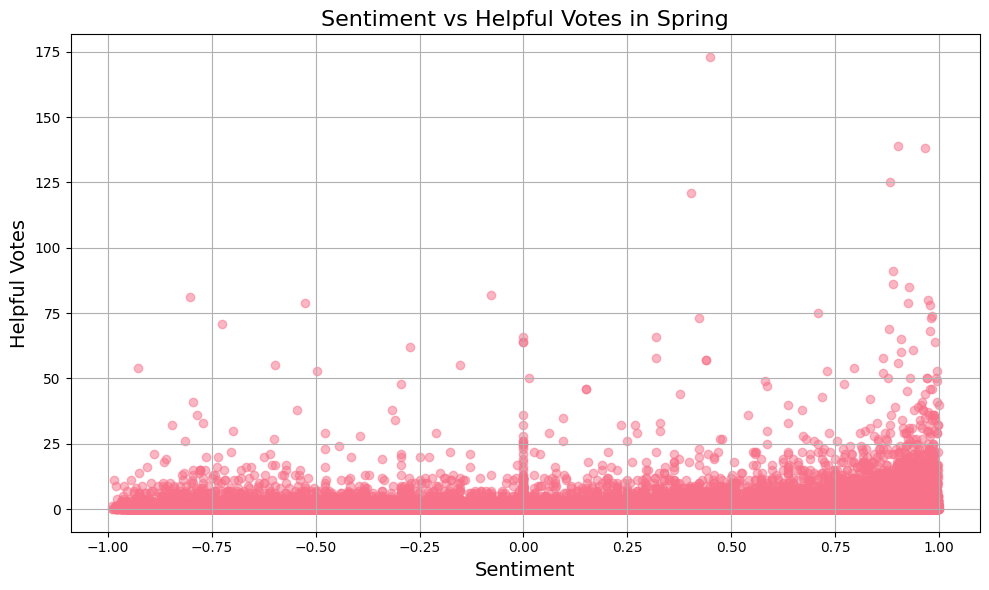

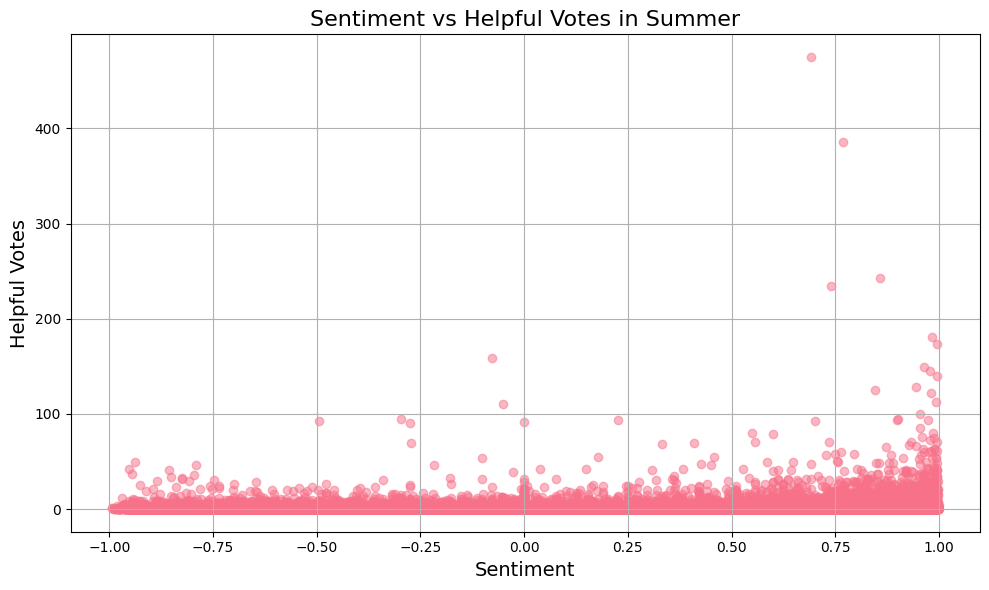

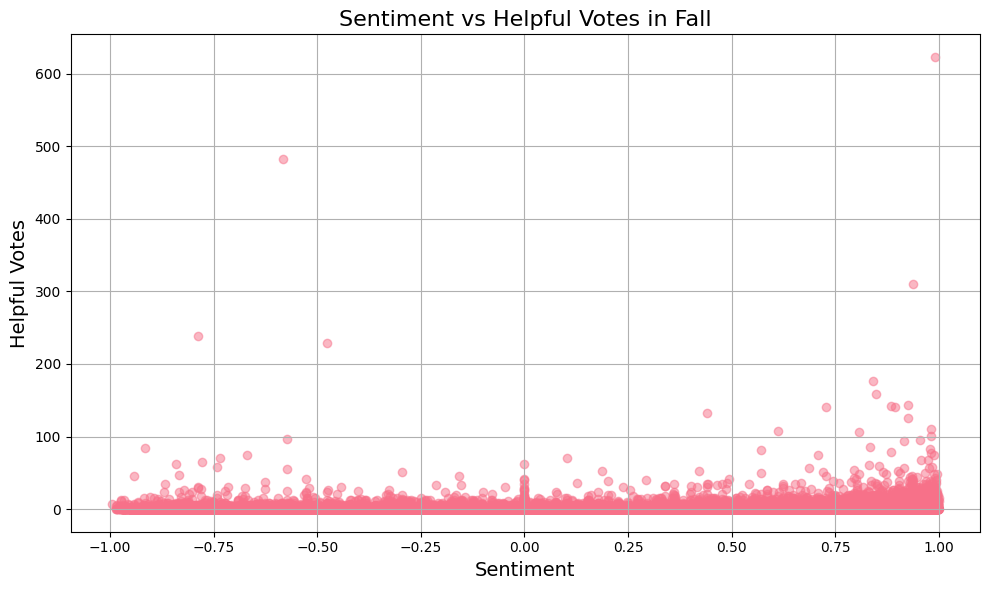

In [44]:
# plot sentiment and helpful votes correlation per season with transparent background

def plot_sentiment_helpful_correlation(df, season):
    season_df = df[df['season'] == season]
    plt.figure(figsize=(10, 6), facecolor='none')
    plt.rcParams['savefig.transparent'] = True
    plt.scatter(season_df['sentiment'], season_df['helpful_vote'], alpha=0.5)
    plt.title(f'Sentiment vs Helpful Votes in {season}', fontsize=16)
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Helpful Votes', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    plot_sentiment_helpful_correlation(df_copy, season)

In [45]:
# TF-IDF analysis of cleaned_text column
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['cleaned_text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

tfidf_df.head()

aa  aaa  aaaa  aaron  aas   ab  aback  abajo  abalone  abandon  ...  \
0  0.0  0.0   0.0    0.0  0.0  0.0    0.0    0.0      0.0      0.0  ...   
1  0.0  0.0   0.0    0.0  0.0  0.0    0.0    0.0      0.0      0.0  ...   
2  0.0  0.0   0.0    0.0  0.0  0.0    0.0    0.0      0.0      0.0  ...   
3  0.0  0.0   0.0    0.0  0.0  0.0    0.0    0.0      0.0      0.0  ...   
4  0.0  0.0   0.0    0.0  0.0  0.0    0.0    0.0      0.0      0.0  ...   

   zones  zoo  zoom  zoomed  zooming  zoot  zper  zulu  zumba   zz  
0    0.0  0.0   0.0     0.0      0.0   0.0   0.0   0.0    0.0  0.0  
1    0.0  0.0   0.0     0.0      0.0   0.0   0.0   0.0    0.0  0.0  
2    0.0  0.0   0.0     0.0      0.0   0.0   0.0   0.0    0.0  0.0  
3    0.0  0.0   0.0     0.0      0.0   0.0   0.0   0.0    0.0  0.0  
4    0.0  0.0   0.0     0.0      0.0   0.0   0.0   0.0    0.0  0.0  

[5 rows x 27302 columns]

In [46]:
# TF-IDF top 10 words per season

for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    season_df = df_copy[df_copy['season'] == season]
    season_tfidf_matrix = tfidf_vectorizer.transform(season_df['cleaned_text'])
    season_tfidf_sum = np.asarray(season_tfidf_matrix.sum(axis=0)).flatten()
    top10_indices = season_tfidf_sum.argsort()[-10:][::-1]
    top10_words = [(tfidf_feature_names[i], season_tfidf_sum[i]) for i in top10_indices]
    print(f"Top 10 TF-IDF words in {season}: {top10_words}")


Top 10 TF-IDF words in Winter: [('love', np.float64(8296.062394399389)), ('great', np.float64(8066.451620873505)), ('fit', np.float64(6851.7961631024755)), ('good', np.float64(5915.378071203051)), ('like', np.float64(5680.432864616774)), ('quality', np.float64(5644.438659416531)), ('nice', np.float64(5488.644581868831)), ('size', np.float64(5068.288900992074)), ('comfortable', np.float64(4923.56501179873)), ('cute', np.float64(4839.539782583962))]
Top 10 TF-IDF words in Spring: [('love', np.float64(7025.111918391474)), ('great', np.float64(5962.192332581414)), ('fit', np.float64(5457.1130461585)), ('like', np.float64(4723.182895661927)), ('good', np.float64(4406.549097927335)), ('size', np.float64(4346.650073091202)), ('cute', np.float64(4108.71110008028)), ('comfortable', np.float64(4088.1970376020877)), ('small', np.float64(4057.3895674112605)), ('quality', np.float64(4000.570797956306))]
Top 10 TF-IDF words in Summer: [('love', np.float64(6857.608561101901)), ('great', np.float64(59

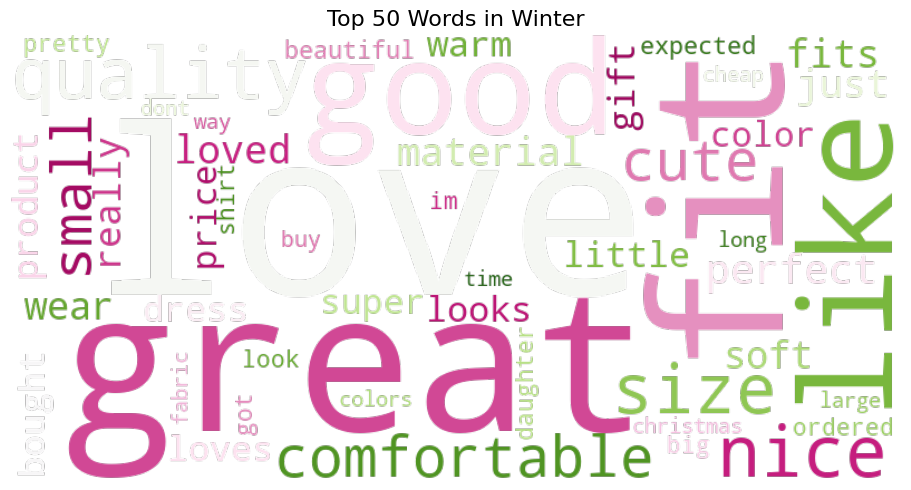

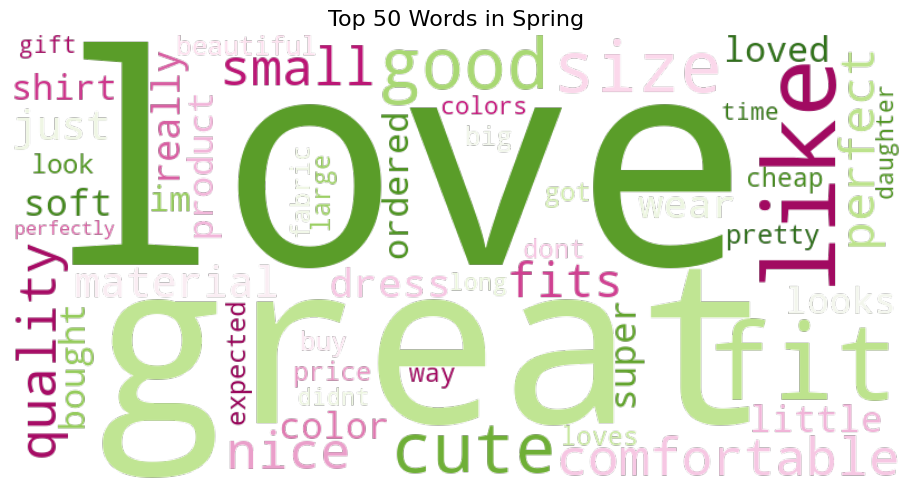

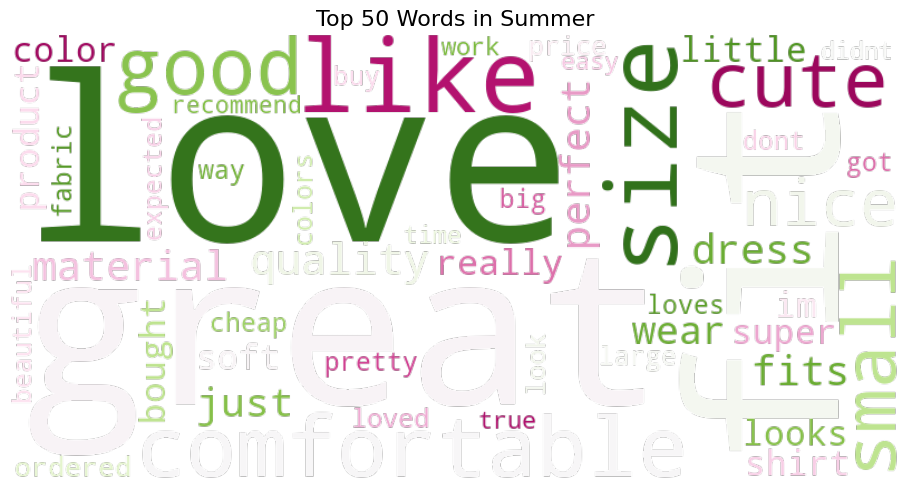

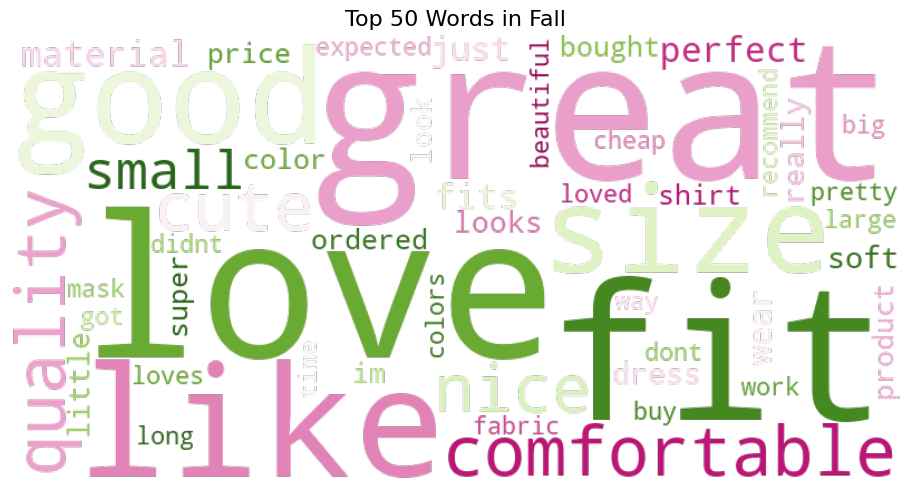

In [47]:
# visualization with transparent background of TF-IDF top words per season
def generate_tfidf_wordcloud(season, top_n=50): 
    season_df = df_copy[df_copy['season'] == season]
    season_tfidf_matrix = tfidf_vectorizer.transform(season_df['cleaned_text'])
    season_tfidf_sum = np.asarray(season_tfidf_matrix.sum(axis=0)).flatten()
    top_indices = season_tfidf_sum.argsort()[-top_n:][::-1]
    top_freq = {tfidf_feature_names[i]: season_tfidf_sum[i] for i in top_indices}
    
    wc = WordCloud(width=800, height=400, background_color=None, mode='RGBA', colormap='PiYG')
    wc = wc.generate_from_frequencies(top_freq)
    
    plt.figure(figsize=(10, 5), facecolor='none')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {top_n} Words in {season}', fontsize=16)
    plt.tight_layout()
    plt.show()

generate_tfidf_wordcloud('Winter')
generate_tfidf_wordcloud('Spring')
generate_tfidf_wordcloud('Summer')
generate_tfidf_wordcloud('Fall')

In [48]:
# top most helpful reviews per season
for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    season_df = df_copy[df_copy['season'] == season]
    top_helpful_review = season_df.loc[season_df['helpful_vote'].idxmax()]
    print(f"\nMost Helpful Review in {season}:")
    print(top_helpful_review[['cleaned_text', 'helpful_vote', 'parent_asin', 'rating', 'sentiment']])




Most Helpful Review in Winter:
cleaned_text    my shirt came fast i wore it for less than an ...
helpful_vote                                                  315
parent_asin                                            B08HPZ3RHR
rating                                                        1.0
sentiment                                                 -0.5256
Name: 171664, dtype: object

Most Helpful Review in Spring:
cleaned_text    and lb i purchased a l i wore it to church and...
helpful_vote                                                  173
parent_asin                                            B07DY3H2XX
rating                                                        5.0
sentiment                                                  0.4497
Name: 765981, dtype: object

Most Helpful Review in Summer:
cleaned_text    belt looks legit good quality just get it you ...
helpful_vote                                                  475
parent_asin                                            B

In [49]:
# average word count per season

df_copy['word_count'] = df_copy['cleaned_text'].apply(lambda x: len(x.split()))
average_word_count_season = df_copy.groupby('season')['word_count'].mean()
print("Average Word Count per Season:")
print(average_word_count_season)

Average Word Count per Season:
season
Fall      29.630689
Spring    27.183130
Summer    27.989585
Winter    26.674577
Name: word_count, dtype: float64
